In [1]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


x_train.shape: (120, 4)
y_train.shape: (120,)
x_test.shape: (30, 4)
y_test.shape: (30,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
len(model.layers): 2


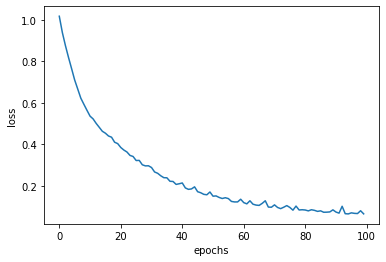

4/4 - 0s - loss: 0.0681 - accuracy: 0.9833
1/1 - 0s - loss: 0.1196 - accuracy: 0.9667
confusion_matrix(C): tf.Tensor(
[[41  0  0]
 [ 0 37  0]
 [ 0  2 40]], shape=(3, 3), dtype=int32)


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#1
def load_Iris(shuffle=False):   
    label={'setosa':0, 'versicolor':1, 'virginica':2}
    path = "/content/gdrive/My Drive/Colab Notebooks/DATA/iris.csv"
    data = np.loadtxt(path, skiprows=1, delimiter=',',
                      converters={4: lambda name: label[name.decode()]})
    if shuffle:
        np.random.shuffle(data)
    return data

def train_test_data_set(iris_data, test_rate=0.2): # train: 0.8, test: 0.2
    n = int(iris_data.shape[0]*(1-test_rate))
    x_train = iris_data[:n,:-1]
    y_train = iris_data[:n, -1]
    
    x_test = iris_data[n:,:-1]
    y_test = iris_data[n:,-1]
    return (x_train, y_train), (x_test, y_test)
    
iris_data = load_Iris(shuffle=True)
(x_train, y_train), (x_test, y_test) = train_test_data_set(iris_data, test_rate=0.2)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:",  x_test.shape)
print("y_test.shape:",  y_test.shape)
  
# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#2
n = 10  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n, input_dim=4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()

#3
def MSE(y, t):
    return tf.reduce_mean(tf.square(y - t)) # (y - t)**2

CCE = tf.keras.losses.CategoricalCrossentropy()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
##model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss= MSE, metrics=['accuracy'])
##model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss= CCE, metrics=['accuracy'])

ret = model.fit(x_train, y_train, epochs=100, verbose=0) # batch_size=32
print("len(model.layers):", len(model.layers))  # 2
loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#4
##print(model.get_weights())
##for i in range(len(model.layers)):
##    print("layer :", i, '-'*20)
##    w = model.layers[i].weights[0].numpy()
##    b = model.layers[i].bias.numpy()
##    print("weights[{}]: {}".format(i, np.array2string(w)))
##    print("bias[{}]:    {}".format(i, np.array2string(b)))

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

In [3]:
import os
path = "/content/gdrive/My Drive/Colab Notebooks/RES"
if not os.path.exists(path):
     os.mkdir("path")
model.save(path + "/5904.h5") 